## Preparing Data For LSTM Model

In [551]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [552]:

data_train = pd.read_csv('./data/BTC_hour_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,24597.0,13243.156,4383.704202,13253.484899,107.330,-1.493057
1,16457.0,13301.134,2632.015967,13302.637974,57.978,-0.971361
2,13745.0,13123.900,2311.532101,13118.022526,-177.234,-1.835620
3,10250.0,13074.934,1450.420425,13095.701257,-48.966,-1.786440
4,12083.0,13199.688,2147.750149,13206.168751,124.754,-0.971692


In [553]:
data_train.describe()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
count,26248.000000,26248.000000,26248.000000,26248.000000,26248.000000,26248.000000
mean,40090.285279,8656.254421,5228.971455,8656.100179,0.607185,0.073900
std,37692.410759,3630.102541,5524.939812,3629.978171,79.782700,1.843444
min,20.000000,3164.016667,0.660509,3164.905481,-1395.075995,-28.178396
25%,17956.750000,6509.269226,2405.579505,6508.946845,-20.505095,-0.960448
50%,29093.500000,8297.317857,3637.814732,8296.721099,0.505946,0.118816
75%,48480.500000,10130.868301,5909.807740,10131.555052,21.981483,1.102232
max,755639.000000,29187.169206,133684.011085,29192.379937,925.312857,35.988690


In [554]:
data_test = pd.read_csv('./data/BTC_hour_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,106591.0,29356.460000,5242.435795,29354.515628,-142.557143,0.761927
1,123334.0,29261.495286,6154.053924,29247.201666,-94.964714,-0.178496
2,76811.0,29300.483750,3565.355044,29308.043545,38.988464,0.338335
3,106278.0,29033.386250,6173.248975,29053.798420,-267.097500,-2.366390
4,183297.0,29058.150000,9878.326297,29062.477560,24.763750,-1.657816


In [555]:
window_size = 48

In [556]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [557]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [558]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [559]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [560]:
X_train.shape, Y_train.shape

((26200, 48, 6), (26200,))

In [561]:
print(X_train)
print(Y_train)

[[[0.03252565 0.38731431 0.03278676 0.38761269 0.64748027 0.41587269]
  [0.02175303 0.38954225 0.01968349 0.3895012  0.62621142 0.42400297]
  [0.01816392 0.38273162 0.01728616 0.3824081  0.52484393 0.41053409]
  ...
  [0.0271936  0.45095502 0.02107954 0.45071626 0.68145475 0.433269  ]
  [0.0249782  0.43997711 0.01963789 0.43987227 0.47810779 0.41023716]
  [0.02500334 0.45254822 0.01931614 0.45221329 0.74221008 0.43748675]]

 [[0.02175303 0.38954225 0.01968349 0.3895012  0.62621142 0.42400297]
  [0.01816392 0.38273162 0.01728616 0.3824081  0.52484393 0.41053409]
  [0.01353857 0.38084999 0.01084473 0.3815505  0.58012259 0.41130053]
  ...
  [0.0249782  0.43997711 0.01963789 0.43987227 0.47810779 0.41023716]
  [0.02500334 0.45254822 0.01931614 0.45221329 0.74221008 0.43748675]
  [0.03044921 0.45215173 0.02801623 0.451219   0.59677842 0.43560301]]

 [[0.01816392 0.38273162 0.01728616 0.3824081  0.52484393 0.41053409]
  [0.01353857 0.38084999 0.01084473 0.3815505  0.58012259 0.41130053]
  [0

## Training LSTM Model

In [562]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [563]:
regressor = Sequential()

regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [564]:
regressor.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 48, 50)            11400     
                                                                 
 dropout_64 (Dropout)        (None, 48, 50)            0         
                                                                 
 lstm_65 (LSTM)              (None, 48, 60)            26640     
                                                                 
 dropout_65 (Dropout)        (None, 48, 60)            0         
                                                                 
 lstm_66 (LSTM)              (None, 48, 80)            45120     
                                                                 
 dropout_66 (Dropout)        (None, 48, 80)            0         
                                                                 
 lstm_67 (LSTM)              (None, 120)             

In [565]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [566]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=260)

Epoch 1/10
101/101 [==============================] - 38s 346ms/step - loss: 0.0018
Epoch 2/10
101/101 [==============================] - 40s 399ms/step - loss: 0.0015
Epoch 3/10
101/101 [==============================] - 43s 429ms/step - loss: 0.0014
Epoch 4/10
101/101 [==============================] - 46s 452ms/step - loss: 0.0014
Epoch 5/10
101/101 [==============================] - 45s 450ms/step - loss: 0.0014
Epoch 6/10
101/101 [==============================] - 50s 494ms/step - loss: 0.0014
Epoch 7/10
101/101 [==============================] - 52s 519ms/step - loss: 0.0014
Epoch 8/10
101/101 [==============================] - 46s 458ms/step - loss: 0.0014
Epoch 9/10
101/101 [==============================] - 46s 455ms/step - loss: 0.0013
Epoch 10/10
101/101 [==============================] - 43s 423ms/step - loss: 0.0013


## Preparing Test Set For LSTM Prediction

In [567]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [568]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [569]:
X_test.shape, Y_test.shape

((5810, 48, 6), (5810,))

## Predicting Outputs For Test Set

In [570]:
Y_pred = regressor.predict(X_test)

In [571]:
Y_test

array([0.03882362, 0.04719084, 0.02394124, ..., 0.03371124, 0.03447535,
       0.03020454])

In [572]:
Y_pred

array([[0.04799962],
       [0.04601058],
       [0.04470762],
       ...,
       [0.04802075],
       [0.04711355],
       [0.04622985]], dtype=float32)

## Descaling Outputs

In [573]:
scale_factor = 1/scaler.scale_[4]


In [574]:
scale_factor

9210.66325338572

In [575]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [576]:
Y_pred.shape, Y_test.shape

((5810, 1), (5810,))

In [577]:
Y_test

array([357.59131133, 434.65892014, 220.5147187 , ..., 310.50287807,
       317.5408267 , 278.20380317])

In [578]:
Y_pred

array([[442.10834],
       [423.788  ],
       [411.7868 ],
       ...,
       [442.30292],
       [433.947  ],
       [425.8076 ]], dtype=float32)

In [579]:
og_data_test = pd.read_csv('./data/BTC_hour_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [580]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [581]:
pred_list

[array([29798.568], dtype=float32),
 array([29685.283], dtype=float32),
 array([29712.271], dtype=float32),
 array([29434.547], dtype=float32),
 array([29451.438], dtype=float32),
 array([29353.479], dtype=float32),
 array([29651.172], dtype=float32),
 array([29570.521], dtype=float32),
 array([29688.457], dtype=float32),
 array([29717.465], dtype=float32),
 array([29575.957], dtype=float32),
 array([29722.477], dtype=float32),
 array([29715.76], dtype=float32),
 array([29711.], dtype=float32),
 array([29710.111], dtype=float32),
 array([29892.352], dtype=float32),
 array([30040.348], dtype=float32),
 array([30145.293], dtype=float32),
 array([30183.568], dtype=float32),
 array([30002.258], dtype=float32),
 array([30035.404], dtype=float32),
 array([30101.055], dtype=float32),
 array([30959.865], dtype=float32),
 array([31822.979], dtype=float32),
 array([31754.006], dtype=float32),
 array([32330.25], dtype=float32),
 array([33201.855], dtype=float32),
 array([33581.547], dtype=float32

In [582]:
price_list

[29714.05131133148,
 29696.154205855775,
 29520.998468703998,
 29389.536830186677,
 29768.8171042826,
 29228.783151492422,
 29541.022721033245,
 29343.516066601016,
 29470.249610386712,
 29468.300542602236,
 29660.185805257417,
 29640.7675872876,
 29583.235327051178,
 29529.303829880464,
 29559.508838764974,
 29883.967462564233,
 30104.545536874084,
 30135.099663112338,
 30155.67815222021,
 30065.670698883765,
 30028.41220012607,
 29897.180096246833,
 32197.408811789188,
 32677.15680490388,
 32157.702474597325,
 32515.161733834775,
 34783.27800070943,
 33691.29171510833,
 33752.301467401296,
 33773.34006026821,
 32528.532105894643,
 33002.39142078445,
 32832.04634235724,
 32900.73802262571,
 32843.94081250923,
 33130.962334748336,
 33042.213455000485,
 32907.30340510662,
 33654.31736345605,
 35139.16747536327,
 34525.71547727608,
 35628.03103624624,
 35290.261197549145,
 35086.91807061641,
 34723.93041985677,
 35123.404638648404,
 34813.44895382933,
 34447.1163648612,
 34841.1802332399

## Visualization & Evaluation

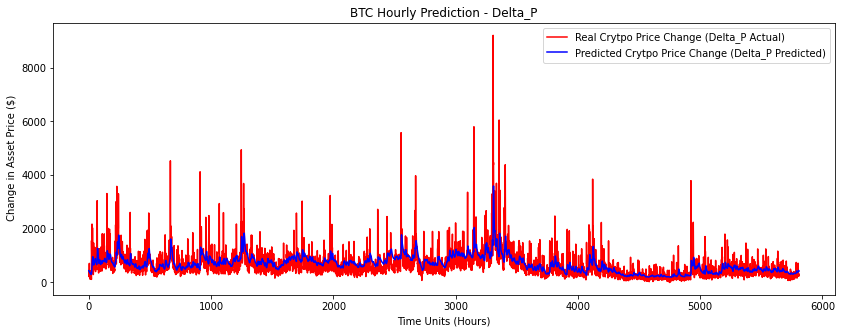

In [583]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Hourly Prediction - Delta_P')
plt.xlabel('Time Units (Hours)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

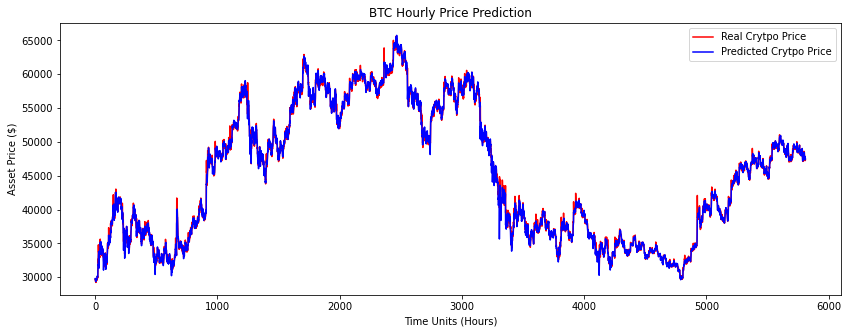

In [584]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Hourly Price Prediction')
plt.xlabel('Time Units (Hours)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [585]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 398.18910394434454


In [586]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.005713255680366555


In [587]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.8073678774315717
